In [1]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
name_label_array = ['B1','B2','B3','B4']
file_list = glob('echo_waves/*200.dat')
file_list.sort()
file_list = file_list[::-1]
file_list

['echo_waves/w1specM50Rw0.99Chi0.69N200.dat',
 'echo_waves/w1specM50RdV0.2Chi0.69N200.dat',
 'echo_waves/w1specM50RbolT10Chi0.69N200.dat',
 'echo_waves/w1XinN200.dat']

In [123]:
range1_array = [[800,1000,0.1],[800,1000,0.1],[800,1000,0.07],[800,1000,1]]
range2_array = [[2550,2700,0.1],[2550,2700,0.1],[2600,2800,0.03],[2550,2700,0.02]]
range3_array = [[5150,5300,0.1],[5150,5300,0.1],[5250,5700,0.02],[5150,5300,0.01]]
height_array = [0.1,0.1,0.1,1]

echo_waves/w1specM50Rw0.99Chi0.69N200.dat


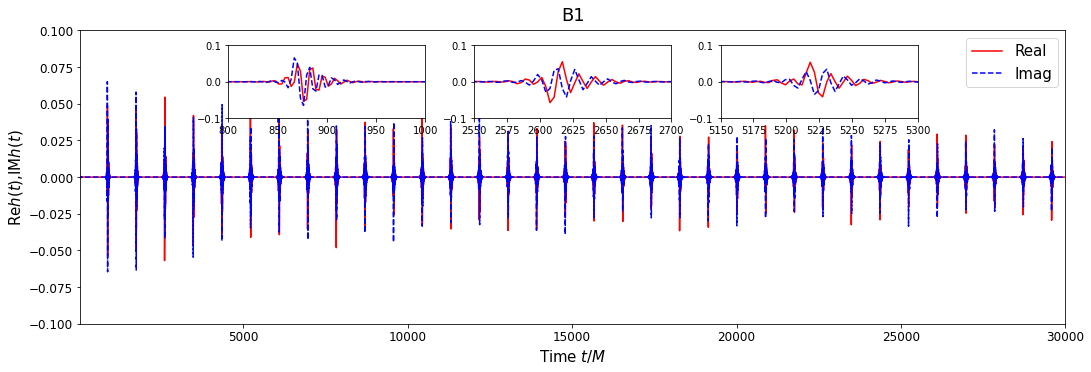

echo_waves/w1specM50RdV0.2Chi0.69N200.dat


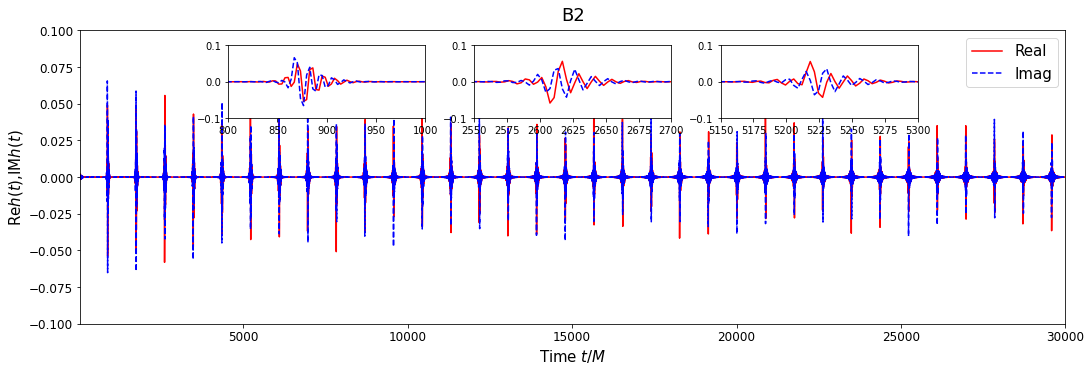

echo_waves/w1specM50RbolT10Chi0.69N200.dat


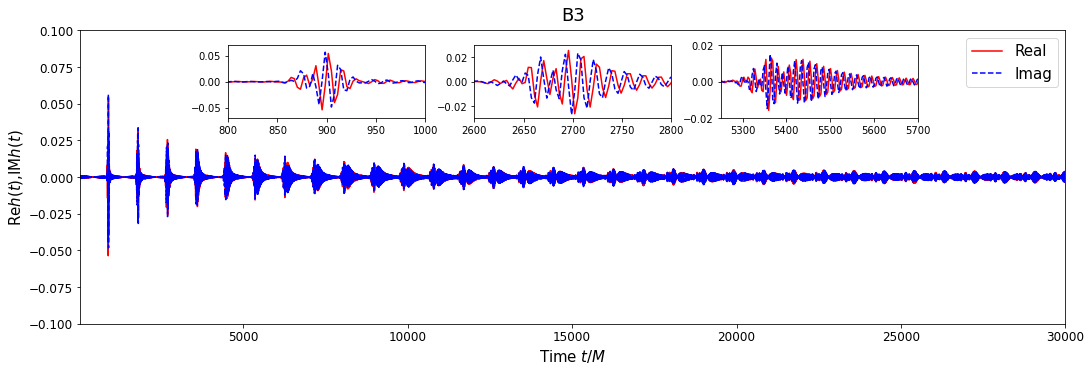

echo_waves/w1XinN200.dat


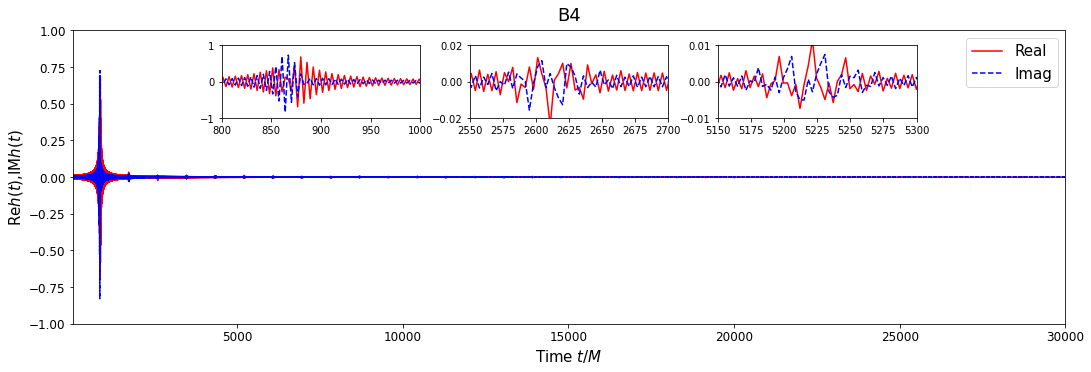

In [167]:
for file,name_string,range1,range2,range3,height in zip(file_list,name_label_array,range1_array,range2_array,range3_array,height_array):
    inject_data = np.genfromtxt(file,delimiter="\t",dtype=np.complex128)
    print(file)
    omega = np.real(inject_data[0::,0])
    frequency = omega/(2*np.pi)
    df = np.diff(frequency)[0]
    duration = 1/df
    dt = duration/len(omega)
    frequency = frequency[0:len(frequency)//2]
    # These lines are used to read the injected echo model file and get the frequency array.
    # The model files contains both the postive and negative frequencies. We only deal with the positive frequencies.

    inject_strain_fre = inject_data[::-1,1]
    inject_strain_time = np.fft.ifft(inject_strain_fre/dt)
    time_array = np.arange(0,duration,dt)

    fig, ax = plt.subplots(figsize=(15,5), constrained_layout=True)
    ax.plot(time_array,np.real(inject_strain_time),c='r',ls='-',label='Real')
    ax.plot(time_array,np.imag(inject_strain_time),c='b',ls='--',label='Imag')
    ax.set_xlim(50,30000)
    ax.set_ylim(-height,height)
    ax.set_xlabel(r'Time $t/M$',fontsize = 15)
    ax.set_ylabel(r'Re$h(t)$,IM$h(t)$',fontsize = 15)    
    
    axins1 = ax.inset_axes((0.15, 0.7, 0.2, 0.25))
    axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
    axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
    axins1.set_xlim(range1[0],range1[1])
    axins1.set_ylim(-range1[2],range1[2])

    axins1 = ax.inset_axes((0.4, 0.7, 0.2, 0.25))
    axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
    axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
    axins1.set_xlim(range2[0],range2[1])
    axins1.set_ylim(-range2[2],range2[2])
    axins1 = ax.inset_axes((0.65, 0.7, 0.2, 0.25))
    axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
    axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
    axins1.set_xlim(range3[0],range3[1])
    axins1.set_ylim(-range3[2],range3[2])
    ax.text(0.5, 1.05, name_string, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 18)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.legend(fontsize = 15)
    plt.savefig('time_domain_figure/'+name_string+'.pdf',dpi=300)
    plt.show()

echo_waves/w1specM50Rw0.99Chi0.69N200.dat


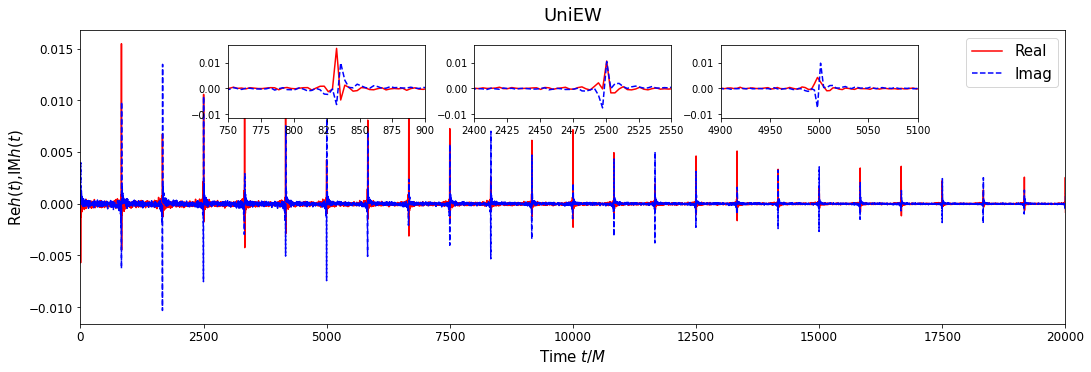

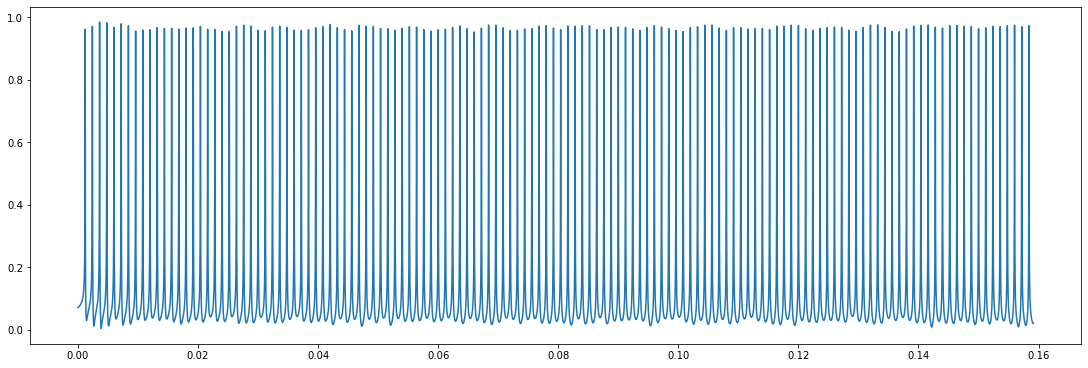

In [4]:
file = file_list[0]
inject_data = np.genfromtxt(file,delimiter="\t",dtype=np.complex128)
print(file)
omega = np.real(inject_data[0::,0])
frequency = omega/(2*np.pi)
df = np.diff(frequency)[0]
duration = 1/df
dt = duration/len(omega)
frequency = frequency[0:len(frequency)//2]

time_array = np.arange(0,duration,dt)
time_domain_strain = np.zeros(len(time_array))
delta_n_array = []
t_n_array = []
numbers = 200

delta_n0 = 0.5
t_n0 = 0.1
random_factor_1 = 1
random_factor_2 = 0
spacing = 1.2e-3
tau = 1/(10**(-4))
for f in np.arange(spacing,numbers * spacing + spacing ,spacing):
    #tau = 10 ## the range of tau is between 1 and 40.2
    #time_domain_strain_part = np.real(np.exp(-time_array/tau)*np.exp(1j*2*np.pi*f*time_array))/tau 
    delta_n = delta_n0
    t_n = t_n0
    if random_factor_1 == 1 :
        delta_n = np.random.random()*2*np.pi*0.1
    if random_factor_2 == 1 :    
        t_n = np.random.random()/spacing
    #delta_n = 0.0
    #t_n = 0.01
    delta_n_array.append(delta_n)
    t_n_array.append(t_n)
    time_domain_strain_part = np.exp(-(time_array-t_n)/tau)*np.exp(1j*2*np.pi*f*(time_array-t_n))/tau *np.exp(1j*delta_n)*np.heaviside((time_array-t_n),1)
    ## /tau is a normalized factor
    time_domain_strain = time_domain_strain + time_domain_strain_part
    
inject_strain_time = time_domain_strain    
fig, ax = plt.subplots(figsize=(15,5), constrained_layout=True)
ax.plot(time_array,np.real(inject_strain_time),c='r',ls='-',label='Real')
ax.plot(time_array,np.imag(inject_strain_time),c='b',ls='--',label='Imag')
ax.set_xlim(0,20000)
# ax.set_ylim(-height,height)
ax.set_xlabel(r'Time $t/M$',fontsize = 15)
ax.set_ylabel(r'Re$h(t)$,IM$h(t)$',fontsize = 15)    

axins1 = ax.inset_axes((0.15, 0.7, 0.2, 0.25))
axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
axins1.set_xlim(750,900)
# axins1.set_ylim(-range1[2],range1[2])

axins1 = ax.inset_axes((0.4, 0.7, 0.2, 0.25))
axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
axins1.set_xlim(2400,2550)
# axins1.set_ylim(-range2[2],range2[2])
axins1 = ax.inset_axes((0.65, 0.7, 0.2, 0.25))
axins1.plot(time_array,np.real(inject_strain_time),c='r',ls='-')
axins1.plot(time_array,np.imag(inject_strain_time),c='b',ls='--')
axins1.set_xlim(4900,5100)
# axins1.set_ylim(-range3[2],range3[2])
ax.text(0.5, 1.05, 'UniEW', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 18)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.legend(fontsize = 15)
plt.savefig('time_domain_figure/uniew_model.pdf',dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(15,5), constrained_layout=True)
ax.plot(frequency,np.abs(np.fft.fft(inject_strain_time*dt))[0:len(frequency)])
# plt.xlim(0,0.10)
plt.show()

In [135]:
plt.

/tmp/ipykernel_85515/71106581.py:14: RuntimeWarning: overflow encountered in exp
  time_domain_strain_part = np.exp(-(time_array-t_n)/tau)*np.exp(1j*2*np.pi*f*(time_array-t_n))/tau *np.exp(1j*delta_n)*np.heaviside((time_array-t_n),1)
/tmp/ipykernel_85515/71106581.py:14: RuntimeWarning: invalid value encountered in true_divide
  time_domain_strain_part = np.exp(-(time_array-t_n)/tau)*np.exp(1j*2*np.pi*f*(time_array-t_n))/tau *np.exp(1j*delta_n)*np.heaviside((time_array-t_n),1)
